# <center>Assignment 2</center>
## <center>Li Nie ln7375</center>

### Question 1
### Suppose we collect data for a group of students in a statistics class, where $X_1$= hours studied, $X_2$ = undergraduate GPA, and Y = whether students receive an A. We fit a logistic regression and produce estimated coefficients $\beta_0$= −6, $\beta_1$= 0.05,and $\beta_2$= 1.

### a) Estimate the probability that a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class.
$$p(X) = \frac{e^{\hat \beta_0 + \hat \beta_1X_1 + \hat \beta_2X_2}}{1 + e^{\hat \beta_0 + \hat \beta_1X_1 + \hat \beta_2X_2}} = \frac{e^{-6 + 0.05*40 + 3.5}}{1 + e^{-6 + 0.05*40 + 3.5}} = \frac{0.6065}{1 + 0.6065} = 0.3775$$

The probability that a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class is 37.75%.

### b) How many hours would the student in part (a) need to study in order to have a 50% chance of getting an A in the class?
$$\frac{p(X)}{1-p(X)} = e^{\hat \beta_0 + \hat \beta_1X_1 + \hat \beta_2X_2}$$

$$\frac{0.5}{0.5} = 1 = e^{\hat \beta_0 + \hat \beta_1X_1 + \hat \beta_2X_2}$$

$$ -6 + 0.05X_1 +3.5 = 0$$

$$X_1 = 50$$

The student needs to study 50 hours in order to have a 50% chance of getting an A in the class.

### Question 2
### (a) Produce some numerical and graphical summaries of the RedWinedata. What patterns do you see? 

According to those summaries, the 11 different features are all numerical ones with float data type while the response variable ("quality") is a categorical one with int data type. There are 1599 entries in the dataset with no missing values. 

According to the histograms of each variable, some variables (like pH and density) seem to follow a normal distribution, and some variables (like fixed acidity) seem to follow a skewed distribution. 

In [1]:
import pandas as pd
data = pd.read_csv('redwine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


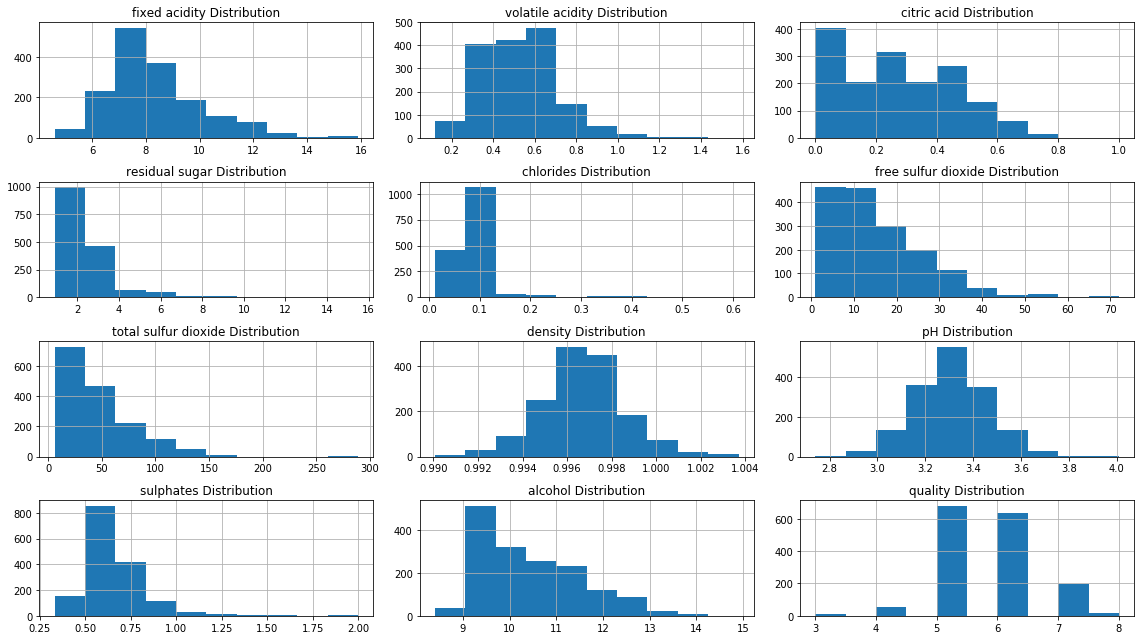

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(16,9))
for i, var_name in enumerate(data.columns):
    ax=fig.add_subplot(4,3,i+1)
    data[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name+" Distribution")
fig.tight_layout()
plt.show()

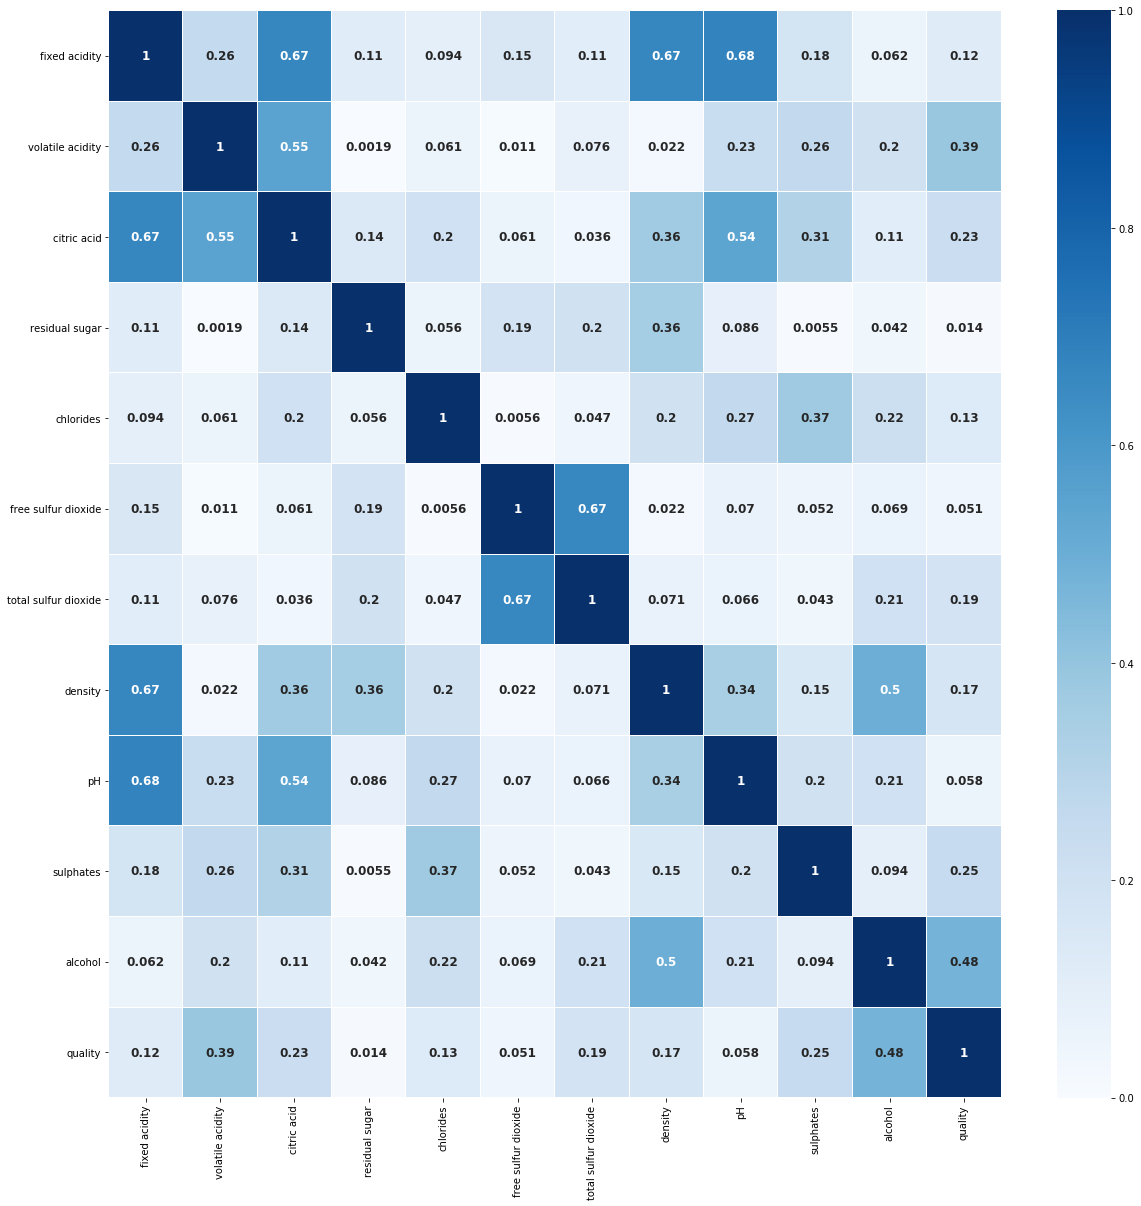

In [5]:
import seaborn as sns

correlations = data.corr()
correlation = abs(correlations)
plt.subplots(figsize=(20, 20))
sns.heatmap(correlation, cmap = "Blues", linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':12,'weight':'bold'})
plt.show()

Text(0.5,1,'quality')

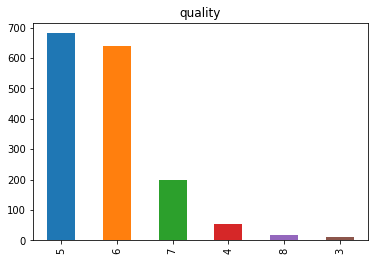

In [6]:
#Counts of "qualuty"
data['quality'].value_counts().plot.bar()
plt.title("quality")

Text(0.5,1,'quality')

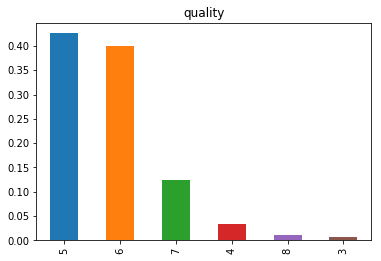

In [7]:
#Percentage of "quality"
(data['quality'].value_counts()/len(data)).plot.bar()
plt.title("quality")

Text(0.5,1,'fixed acidity')

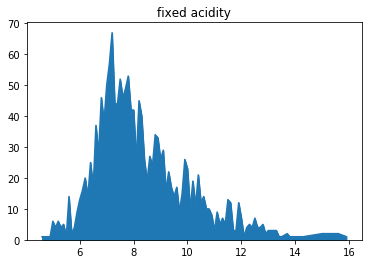

In [8]:
#Distribution of "fixed acidity"
data['fixed acidity'].value_counts().sort_index().plot.area()
plt.title("fixed acidity")

Text(0.5,1,'volatile acidity')

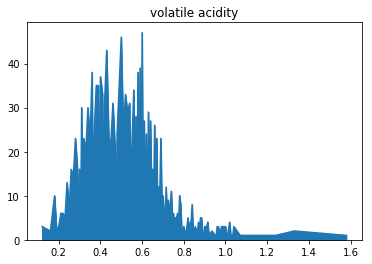

In [9]:
#Distribution of "volatile acidity"
data['volatile acidity'].value_counts().sort_index().plot.area()
plt.title("volatile acidity")

Text(0.5,1,'citric acid')

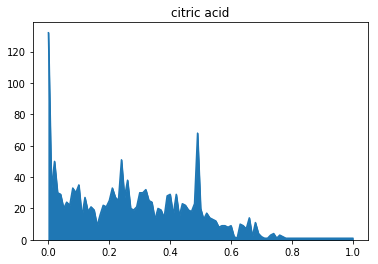

In [10]:
data['citric acid'].value_counts().sort_index().plot.area()
plt.title("citric acid")

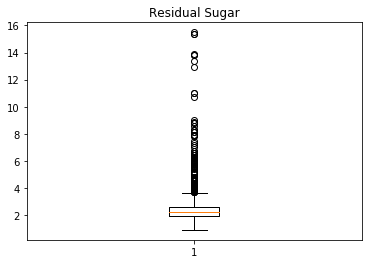

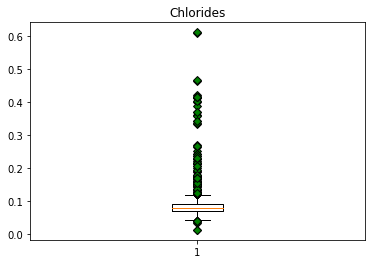

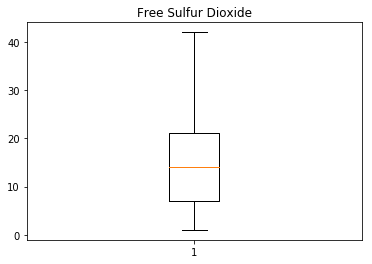

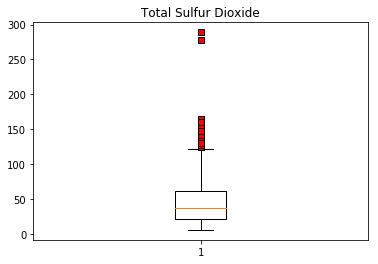

In [11]:
fig1, ax1 = plt.subplots()
ax1.set_title('Residual Sugar')
ax1.boxplot(data['residual sugar'])

green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots()
ax2.set_title('Chlorides')
ax2.boxplot(data['chlorides'], flierprops=green_diamond)

fig3, ax3 = plt.subplots()
ax3.set_title('Free Sulfur Dioxide')
ax3.boxplot(data['free sulfur dioxide'], showfliers=False)

red_square = dict(markerfacecolor='r', marker='s')
fig4, ax4 =plt.subplots()
ax4.set_title('Total Sulfur Dioxide')
ax4.boxplot(data['total sulfur dioxide'], flierprops=red_square)
plt.show()

Text(0.5,1,'density')

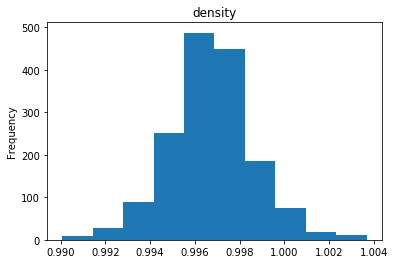

In [12]:
data['density'].plot.hist() 
plt.title("density")

Text(0.5,1,'pH')

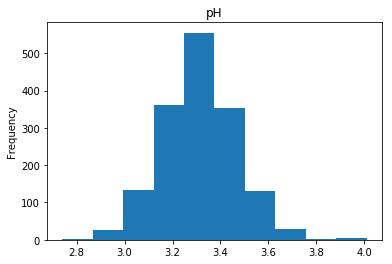

In [13]:
data['pH'].plot.hist()
plt.title("pH")

Text(0.5,1,'sulphates')

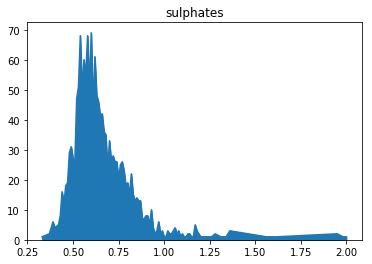

In [14]:
data['sulphates'].value_counts().sort_index().plot.area()
plt.title("sulphates")

Text(0.5,1,'alcohol')

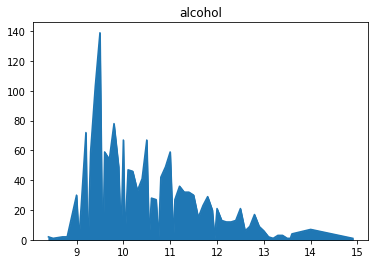

In [15]:
data['alcohol'].value_counts().sort_index().plot.area()
plt.title("alcohol")

### (b) Create a binary variable, final_quality, that contains a 1 if quality contains a value above its mean, and a 0 if quality contains a value below its mean. Use the full data set to perform a logistic regression with final_quality as the response and other variables as predictors (besides the original quality variable). Provide a summary of your obtained results. (use the summary function in R/statsmodel in python). Do any of the predictors appear to be statistically significant? If so, which ones?

According to the summary provided by statsmodel.api below, "volatile acidity", "citric acid", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "sulphates" and "alcohol" are the predictors that appear to be statistically significant as their corrsponding p-values are all below 0.05.

In [16]:
df = data
df['final_quality'] = ''

def func(q):
    if q>=5.636023:
        return 1
    else:
        return 0
df['final_quality'] = df.apply(lambda x: func(x.quality), axis = 1)

df[:50]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,final_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'final_quality'],
      dtype='object')

In [18]:
#Perform Logistic Regression using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score

X = data.iloc[:,:-2]
y = data.iloc[:,-1]

clf_lr = LogisticRegression()
clf_lr.fit(X, y)
y_pred = clf_lr.predict(X)
print("Accuracy: {:.6f}".format(accuracy_score(y, y_pred)))
print("Error: {:.6f}".format(1-accuracy_score(y, y_pred)))
print("R square: {:.6f}".format(r2_score(y, y_pred)))

Accuracy: 0.743590
Error: 0.256410
R square: -0.030607


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
#Perform Logistic Regression using statsmodel.api
import statsmodels.api as sm

logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          final_quality   No. Observations:                 1599
Model:                          Logit   Df Residuals:                     1588
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Mar 2019   Pseudo R-squ.:                  0.2504
Time:                        18:25:01   Log-Likelihood:                -827.96
converged:                       True   LL-Null:                       -1104.5
                                        LLR p-value:                1.988e-112
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0952      0.063      1.508      0.132      -0.029       0.219
volatile acidity        -3.3200      0.484     -6.853      0.000      -4.269      -2.371
citric acid             -1.2788      0.564     -2.269      0.023      -2.383      -0.174
residual sugar           0.0381      0.043      0.879      0.379      -0.047       0.123
chlorides               -3.9867      1.566     -2.546      0.011      -7.056      -0.917
free sulfur dioxide      0.0226      0.008      2.749      0.006       0.006       0.039
total sulfur dioxide    -0.0165      0.003     -5.728      0.000      -0.022      -0.011
density                 -7.0983      2.359     -3.008      0.003     -11.723      -2.474
pH                      -0.5946      0.601     -0.990      0.322      -1.772       0.583
sulphates                2.7362      0.438      6.245      0.000       1.877       3.595
alcohol                  0.9065      0.074     12.212      0.000       0.761       1.052
========================================================================================
"""

## (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.
The overall accuracy is around 74.36%.Logistic Regression correctly predited 542 samples with lable "0" (True Positive), and there is a "202" in the top right corner which inidicates the number of instances that are with lable "0" but predicted as label "1" (False Negative).

But this model also correctly predicted 647 samples with lable "1" (True Negative), and there is a "208" in the lower left corner which indicates the instances are with lable "1" but predicted as label "0" (False Positive).

Here, FN represents the Type1 error which indicates falsely rejected the positive values and predicted them as negative ones. FP represents the Type2 error which indicates falsely accept the negative values and predicted them as positive ones.

$$Overall \ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} = 0.7436$$

$$Precision = \frac{TP}{TP+FP}$$

$$Recall = \frac{TP}{TP+FN}$$

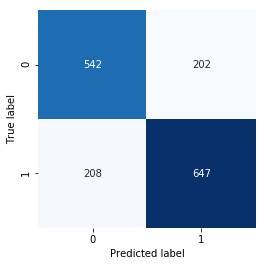

In [20]:
from sklearn.metrics import confusion_matrix

def visualize_confusion_matrix (y_pred):
    mat = confusion_matrix(y_pred, y)
    sns.heatmap(mat.T, cmap = "Blues", square = True, annot = True, fmt = 'd', cbar = False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

visualize_confusion_matrix(y_pred)

### (d) Perform KNN on the full data set, with several values of K, in order to predict final_quality. What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number samples in training:", len(X_train))
print("Number samples in testing:", len(X_test))

Number samples in training: 1279
Number samples in testing: 320


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

best_score = 0
for p_val in [1, 2]:
    for i in [2, 3, 4, 5, 6, 7]:
        knn_clf = KNeighborsClassifier(n_neighbors = i, p = p_val)
        fold_accuracies = cross_val_score(knn_clf, X_train, y_train, cv = 5)
        score = fold_accuracies.mean()
        print("K =", i, "p_val =", p_val)
        print("Accuracy:{:0.6f}".format(score))
        print("Test error{:0.6f}".format(1-score))
        print('\n')
        if score > best_score:
            knn_param = {'n_neighbors': i, 'p': p_val}
            best_score = score

print("Best accuracy on cross-validation: {:0.6f}".format(best_score))
print("Best test error on cross-validation: {:0.6f}".format(1-score))
print("Best parameters: {}".format(knn_param))

K = 2 p_val = 1
Accuracy:0.658353
Test error0.341647


K = 3 p_val = 1
Accuracy:0.687293
Test error0.312707


K = 4 p_val = 1
Accuracy:0.667734
Test error0.332266


K = 5 p_val = 1
Accuracy:0.663040
Test error0.336960


K = 6 p_val = 1
Accuracy:0.656012
Test error0.343988


K = 7 p_val = 1
Accuracy:0.659949
Test error0.340051


K = 2 p_val = 2
Accuracy:0.645068
Test error0.354932


K = 3 p_val = 2
Accuracy:0.656769
Test error0.343231


K = 4 p_val = 2
Accuracy:0.641897
Test error0.358103


K = 5 p_val = 2
Accuracy:0.638018
Test error0.361982


K = 6 p_val = 2
Accuracy:0.641967
Test error0.358033


K = 7 p_val = 2
Accuracy:0.643487
Test error0.356513


Best accuracy on cross-validation: 0.687293
Best test error on cross-validation: 0.356513
Best parameters: {'n_neighbors': 3, 'p': 1}


In [23]:
#Perform KNN using best parameters found on the whole dataset
from sklearn.metrics import classification_report

knn_clf = KNeighborsClassifier(**knn_param)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

print("Accuracy: {:0.6f}".format(accuracy_score(y_test, knn_pred)))
print("Test error: {:0.6f}".format(1-accuracy_score(y_test, knn_pred)))
print("Classifiaction Report:\n", classification_report(y_test, knn_pred))

Accuracy: 0.656250
Test error: 0.343750
Classifiaction Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63       148
           1       0.68      0.67      0.68       172

   micro avg       0.66      0.66      0.66       320
   macro avg       0.65      0.66      0.65       320
weighted avg       0.66      0.66      0.66       320



### Question 3
### (a) Split the data into a training set (80%) and a test set (20%).

In [24]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number samples in training:", len(X_train))
print("Number samples in testing:", len(X_test))

Number samples in training: 1279
Number samples in testing: 320


### (b) Perform LDA on the training data in order to predict final_quality using other variables as predictors. What is the test error of the model obtained?

25% Test error.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train, y_train)
LDA_pred = clf_LDA.predict(X_test)

print("Accuracy: {:0.6f}".format(accuracy_score(y_test, LDA_pred)))
print("Test error: {:0.6f}".format(1-accuracy_score(y_test, LDA_pred)))
print('R square: %.6f' % r2_score(y_test, LDA_pred))
print("Classifiaction Report:\n", classification_report(y_test, LDA_pred))
print()

Accuracy: 0.750000
Test error: 0.250000
R square: -0.005657
Classifiaction Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       148
           1       0.77      0.76      0.76       172

   micro avg       0.75      0.75      0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320




### (c) Perform QDA on the training data in order to predict final_quality using other variables as predictors. What is the test error of the model obtained?

30% Test error.

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, y_train)
QDA_pred = clf_QDA.predict(X_test)

print("Accuracy: {:0.6f}".format(accuracy_score(y_test, QDA_pred)))
print("Test error: {:0.6f}".format(1-accuracy_score(y_test, QDA_pred)))
print('R square: %.6f' % r2_score(y_test, QDA_pred))
print("Classifiaction Report:\n", classification_report(y_test, QDA_pred))

Accuracy: 0.700000
Test error: 0.300000
R square: -0.206788
Classifiaction Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64       148
           1       0.69      0.80      0.74       172

   micro avg       0.70      0.70      0.70       320
   macro avg       0.70      0.69      0.69       320
weighted avg       0.70      0.70      0.70       320

